In [1]:
# learning segmentation
import matplotlib.pyplot as plt
from torchvision.datasets import VOCSegmentation

# Load the Pascal VOC dataset
dataset = VOCSegmentation(root='./', year='2012', image_set='train', download=True)


 13%|█▎        | 260669440/1999639040 [00:08<00:58, 29945489.07it/s]


KeyboardInterrupt: ignored

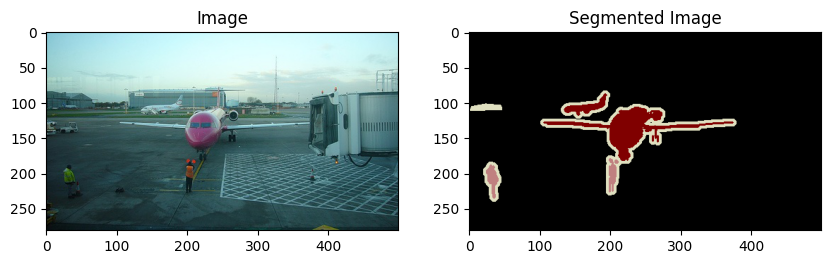

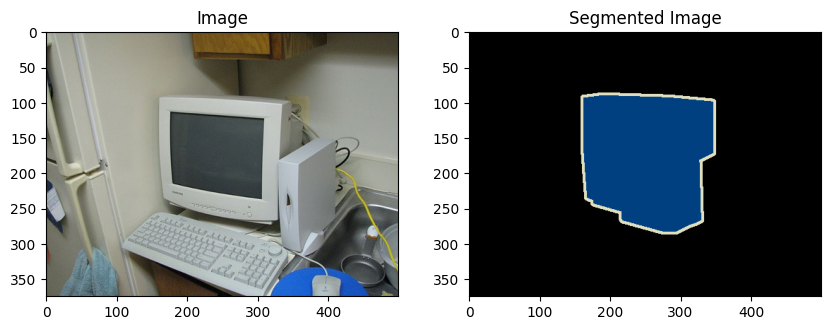

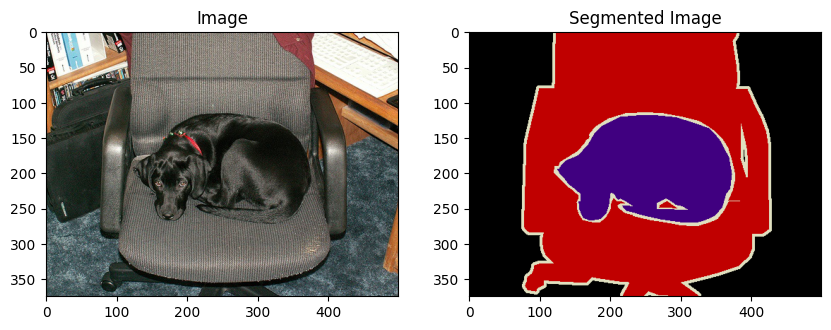

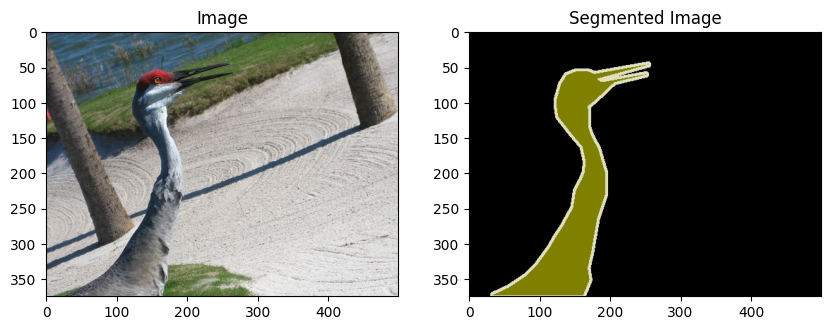

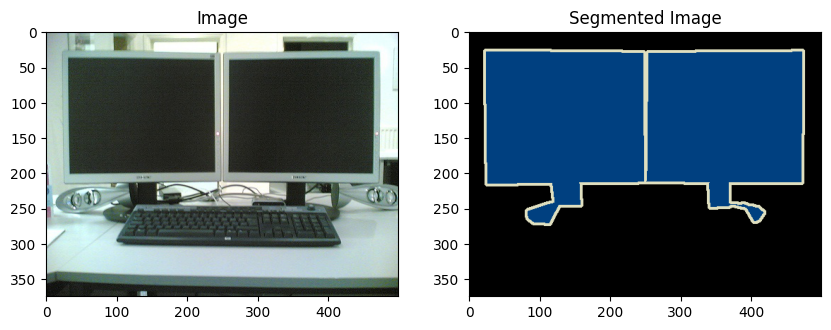

In [2]:
def show_sample(img, target):
    plt.figure(figsize=(10,5))

    plt.subplot(121)
    plt.imshow(img)
    plt.title('Image')

    plt.subplot(122)
    plt.imshow(target)
    plt.title('Segmented Image')

    plt.show()

# Display the first 5 samples
for i in range(5):
    img, target = dataset[i]
    show_sample(img, target)


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [18]:

class SegModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=2, stride=2),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels=64, out_channels=255, kernel_size=2, stride=2),
        nn.Sigmoid(),
    )
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [19]:
from torchvision.transforms import functional as F
import numpy as np
from torchvision.datasets import VOCSegmentation

class CustomTransform:
    def __init__(self, output_size):
      self.output_size = output_size

    def __call__(self, img, target):
        img = F.resize(img, self.output_size)
        target = F.resize(target, self.output_size)
        img = F.to_tensor(img)
        img = F.normalize(img, (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        target = torch.as_tensor(np.array(target), dtype=torch.long)
        return img, target

# Create an instance of the custom transform
custom_transform = CustomTransform(output_size=(196,196))

# Load the Pascal VOC dataset with the custom transform
trainset = VOCSegmentation(root='./', year='2012', image_set='train', download=True, transforms=custom_transform)

# Define a DataLoader for the training set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to ./


In [20]:
for i, (images, targets) in enumerate(trainloader):
  print(images.shape)
  print(targets.shape)
  print(targets)
  break

torch.Size([64, 3, 196, 196])
torch.Size([64, 196, 196])
tensor([[[10, 10, 10,  ..., 10, 10, 10],
         [10, 10, 10,  ..., 10, 10, 10],
         [10, 10, 10,  ..., 10, 10, 10],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        [[ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        [[ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        ...,

        [[ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         ...,
      

In [21]:
def train_loop(model, trainloader, optimizer, loss_fn, n_epochs=1):
  model.train()
  for epoch in range(n_epochs):
    avg_loss = 0.0
    for i, (images, targets) in enumerate(trainloader):
      #print(images.shape)
      #print(targets.shape)
      targets = targets.long()  # Ensure targets are long type
      masks = model(images)
      # print(f'masks {masks.shape}')
      loss = loss_fn(masks, targets)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      avg_loss += loss.item() / len(trainloader)
    print(f'Epoch {epoch+1}, Loss: {avg_loss}')




In [22]:
model = SegModel()
loss_fn = nn.CrossEntropyLoss(ignore_index=255)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_loop(model, trainloader, optimizer, loss_fn, n_epochs=10)


Epoch 1, Loss: 4.763277862382973
Epoch 2, Loss: 4.676516408505647


KeyboardInterrupt: ignored

In [1]:
model.eval()
for i, (images, targets) in enumerate(trainloader):
  targets = targets.long()  # Ensure targets are long type
  with torch.no_grad():
    masks = model(images)
    print(masks.shape)
    plt.imshow(masks[0])
    plt.title('Segmented Image')
    plt.show()
    break




NameError: ignored

Using downloaded and verified file: ./VOCtrainval_11-May-2012.tar
Extracting ./VOCtrainval_11-May-2012.tar to ./


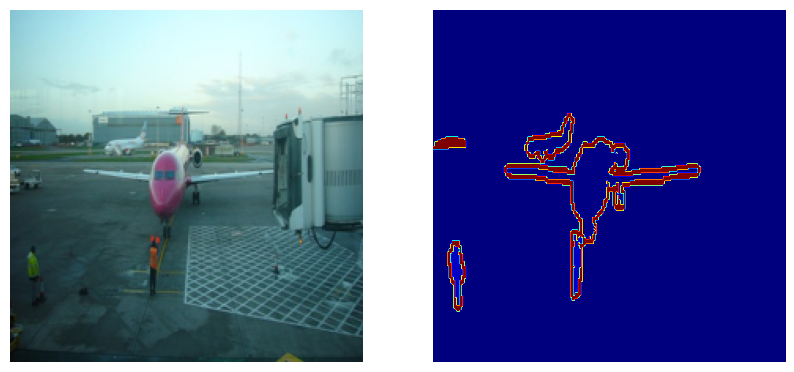

In [18]:
from torchvision.transforms import ToTensor
from torchvision.datasets import VOCSegmentation
import matplotlib.pyplot as plt

# Define a custom transform class


class CustomTransform:
    def __init__(self, output_size):
      self.output_size = output_size

    def __call__(self, img, target):
        img = F.resize(img, self.output_size)
        target = F.resize(target, self.output_size)
        img = F.to_tensor(img)
        # img = F.normalize(img, (0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        target = torch.as_tensor(np.array(target), dtype=torch.long)
        return img, target

# Specify the transform
custom_transform = CustomTransform(output_size=(224,224))


# Load the Pascal VOC dataset
voc = VOCSegmentation(root='./', year='2012', image_set='train', download=True, transforms=custom_transform)

# Get an image and its corresponding mask
img, mask = voc[0]

# Plot the image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')

# Plot the mask
plt.subplot(1, 2, 2)
plt.imshow(mask.squeeze(), cmap='jet')
plt.axis('off')

plt.show()



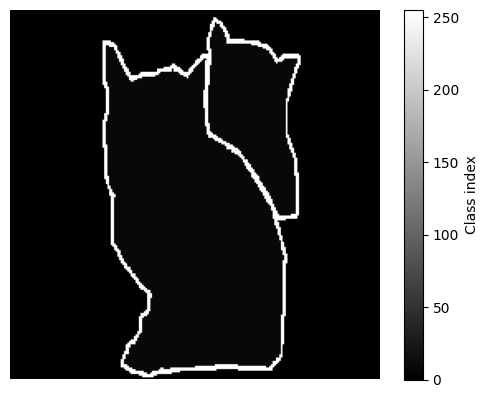

Unique class indices in the mask: [  0   8 255]
Mask values:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:

# Get an image and its corresponding mask
img, mask = voc[30]

# Convert the mask tensor to a numpy array and squeeze to remove the channel dimension
mask_np = mask.squeeze().numpy()

# Plot the mask in grayscale
plt.imshow(mask_np, cmap='gray')
plt.colorbar(label='Class index')
plt.axis('off')
plt.show()

# Print the unique class indices in the mask
print("Unique class indices in the mask:", np.unique(mask_np))

# Print the actual mask values
print("Mask values:")
print(mask_np)

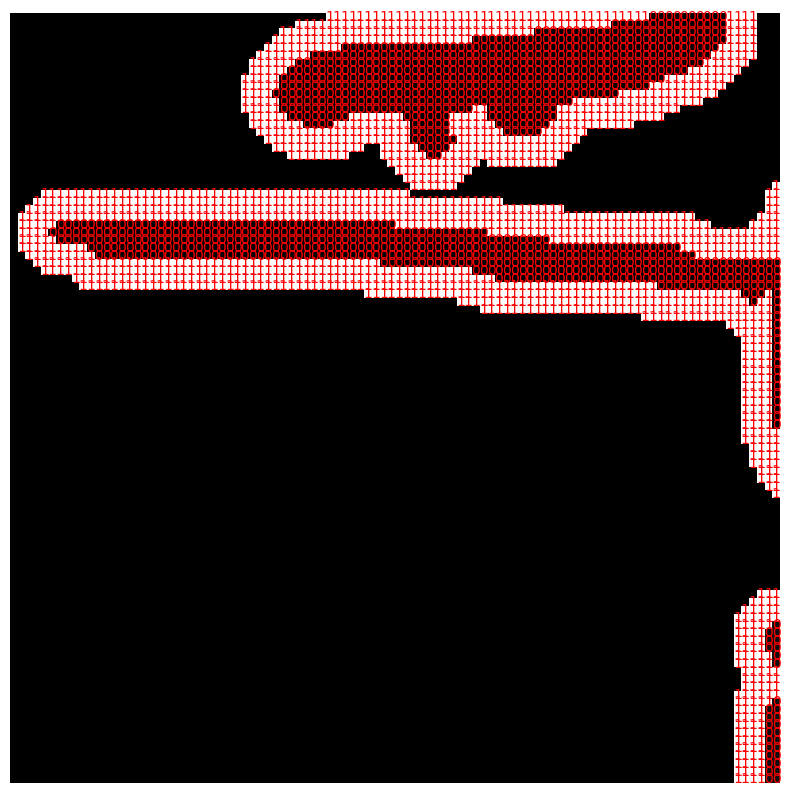

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Convert the mask tensor to a numpy array and squeeze to remove the channel dimension
mask_np = mask.squeeze().numpy()

# Choose a subset of the mask
subset_mask = mask_np[100:200, 100:200]

# Plot the mask in grayscale
plt.figure(figsize=(10, 10))
plt.imshow(subset_mask, cmap='gray')

# Add the class index to each pixel
for i in range(subset_mask.shape[0]):
    for j in range(subset_mask.shape[1]):
        if subset_mask[i, j] > 0:
            plt.text(j, i, int(subset_mask[i, j]), ha='center', va='center', color='red')

plt.axis('off')
plt.show()



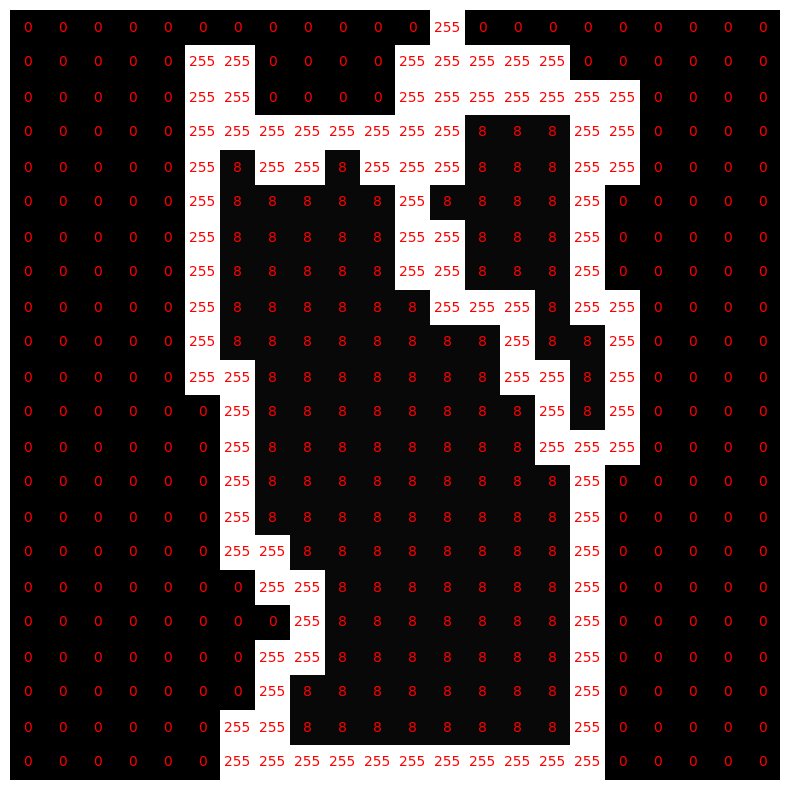

In [29]:
import torch
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

# Get an image and its corresponding mask
img, mask = voc[30]

# Convert the mask to a float tensor
mask = mask.float()

# Downsample the mask using MaxPool2d
downsample = torch.nn.MaxPool2d(10, stride=10)
downsampled_mask = downsample(mask.unsqueeze(0)).squeeze(0).squeeze(0)

# Convert the downsampled mask tensor to a numpy array
mask_np = downsampled_mask.numpy()


# Plot the mask in grayscale
plt.figure(figsize=(10, 10))
plt.imshow(mask_np, cmap='gray')

# Add the class index to each pixel
for i in range(mask_np.shape[0]):
    for j in range(mask_np.shape[1]):
        #if mask_np[i, j] > 0:
        plt.text(j, i, int(mask_np[i, j]), ha='center', va='center', color='red')

plt.axis('off')
plt.show()


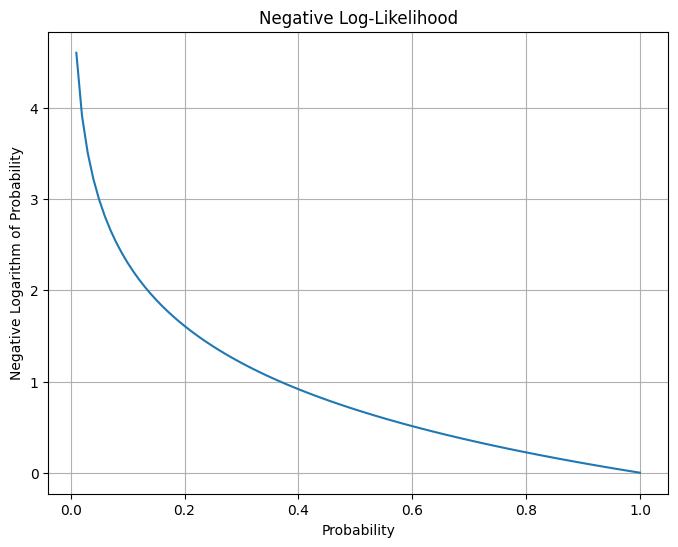

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of probabilities between 0.01 and 1
probabilities = np.linspace(0.01, 1, 100)

# Compute the negative log of these probabilities
neg_log_probs = -np.log(probabilities)

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(probabilities, neg_log_probs)
plt.title('Negative Log-Likelihood')
plt.xlabel('Probability')
plt.ylabel('Negative Logarithm of Probability')
plt.grid(True)
plt.show()


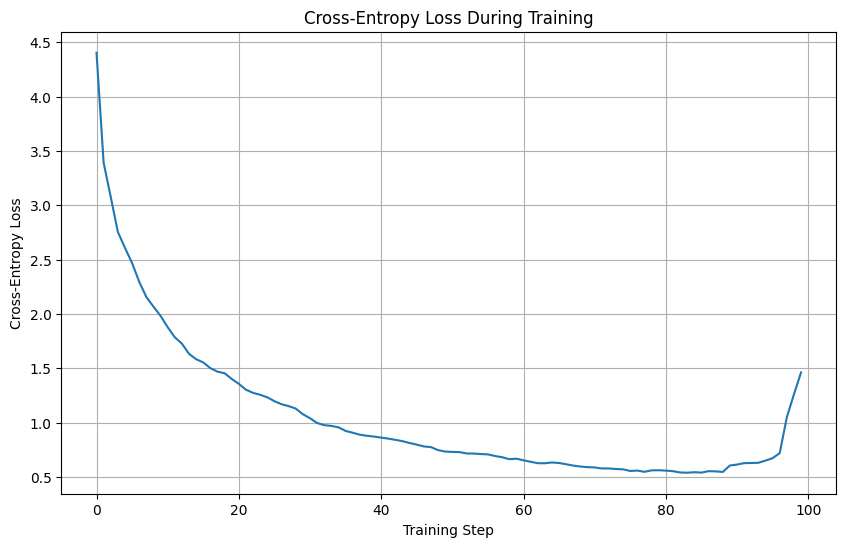

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Set the random seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# Number of examples and training steps
n_examples = 10
n_steps = 100

# True labels (randomly assigned)
y_true = torch.randint(2, size=(n_examples,))

# Model's predictions (randomly initialized and then gradually improved)
p_pred = torch.rand(n_examples, n_steps)
p_pred = torch.sort(p_pred, dim=1)[0]

# Compute the cross-entropy loss at each training step
losses = torch.zeros(n_steps)
for t in range(n_steps):
    losses[t] = F.binary_cross_entropy(p_pred[:, t], y_true.float())

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(losses.numpy())
plt.xlabel('Training Step')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss During Training')
plt.grid(True)
plt.show()

